## Installing Relevant Packages

In [23]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 880.9 kB/s eta 0:02:51
   ---------------------------------------- 0.3/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 0.5/150.0 MB 2.7 MB/s eta 0:00:56
   ---------------------------------------- 0.7/150.0 MB 3.2 MB/s eta 0:00:47
   ---------------------------------------- 0.9/150.0 MB 3.5 MB/s eta 0:00:43
   ---------------------------------------- 1.1/150.0 MB 3.6 MB/s eta 0:00:41
   ---------------------------------------- 1.4/150.0 MB 3.7 MB/s eta 0:00:40
   ---------------------------------------- 1.6/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 1.8/150.0 MB 3.8 MB/s eta 0:00:39
    --------------------------------------- 2.0/150.0 MB 4.0 MB/s eta 0:00:38
    --------------------------------------- 2.2/150.0 MB 4.1 MB/s eta 0:00:3

In [23]:
!pip install shap

   ---------------------------------------- 0.0/490.6 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/490.6 kB 3.6 MB/s eta 0:00:01
   --------------------------- ------------ 337.9/490.6 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 490.6/490.6 kB 3.8 MB/s eta 0:00:00


## Importing Libraries and Dataset

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, 
                           mean_absolute_error, 
                           mean_absolute_percentage_error,
                           explained_variance_score)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from matplotlib.font_manager import FontProperties

In [14]:
df = pd.read_csv("global_housing_market_extended.csv")

## Basic Exploratory Data Analysis

In [16]:
df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


In [20]:
df.isnull().sum()

Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

In [22]:
df.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748


## Setting Style

In [24]:
# Set style
plt.style.use('ggplot')
sns.set_style("whitegrid")
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.size'] = 12

## Data Preparation

In [26]:
df['Price_to_Rent'] = df['House Price Index'] / df['Rent Index']
df['Income_Adjusted_Mortgage'] = df['Mortgage Rate (%)'] / df['Affordability Ratio']
df['Real_Mortgage_Rate'] = df['Mortgage Rate (%)'] - df['Inflation Rate (%)']
df['Housing_Load'] = df['Affordability Ratio'] * df['Urbanization Rate (%)']
df['log_Construction'] = np.log1p(df['Construction Index'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Prepare data
X = df.drop(["Country", "Year", "House Price Index"], axis=1, errors='ignore')
y = df["House Price Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the XGBoost Model

In [29]:
# Train model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'eval_metric': 'rmse',
    'seed': 42,
    'reg_alpha': 1,
    'reg_lambda': 1
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    verbose_eval=False
)

## Metrics Table

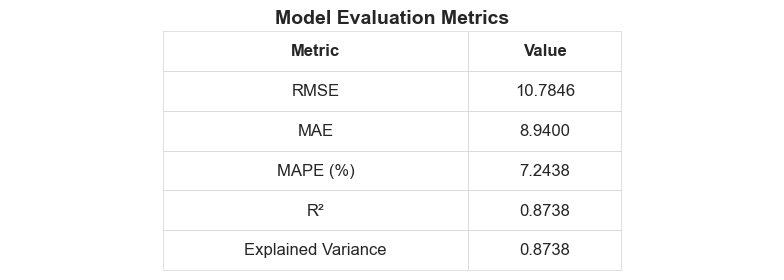

In [33]:
# Predictions and metrics
y_pred = model.predict(dtest)
metrics = [
    ("RMSE", np.sqrt(mean_squared_error(y_test, y_pred))),
    ("MAE", mean_absolute_error(y_test, y_pred)),
    ("MAPE (%)", mean_absolute_percentage_error(y_test, y_pred) * 100),
    ("R²", r2_score(y_test, y_pred)),
    ("Explained Variance", explained_variance_score(y_test, y_pred))
]

# Display Metrics Table
plt.figure(figsize=(8, 3))
ax = plt.gca()
ax.axis('off')

table = plt.table(
    cellText=[[name, f"{value:.4f}"] for (name, value) in metrics],
    colLabels=["Metric", "Value"],
    colWidths=[0.4, 0.2],
    cellLoc='center', 
    loc='center'
)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    cell.set_edgecolor('lightgray')
    cell.set_height(0.2)

plt.title("Model Evaluation Metrics", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Actual vs Predicted Plot

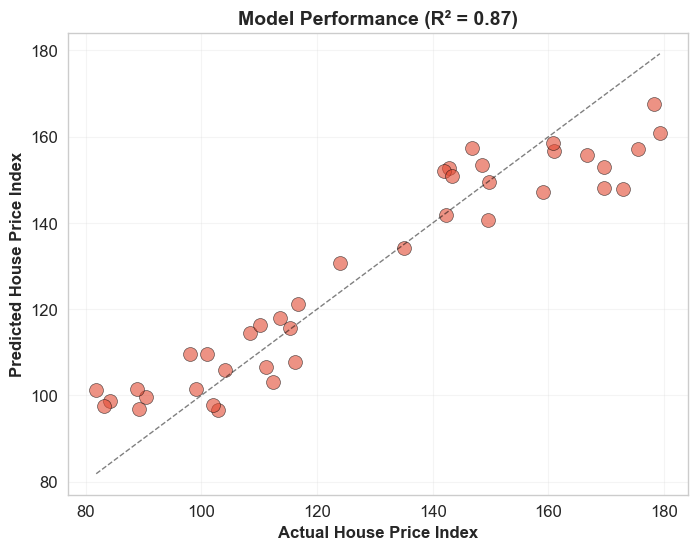

In [35]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=100, edgecolor='k', linewidth=0.5)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'k--', lw=1, alpha=0.5)
plt.xlabel('Actual House Price Index', fontsize=12)
plt.ylabel('Predicted House Price Index', fontsize=12)
plt.title(f'Model Performance (R² = {metrics[3][1]:.2f})', fontsize=14)
plt.grid(True, alpha=0.2)
plt.show()

## Feature Importance

<Figure size 1000x600 with 0 Axes>

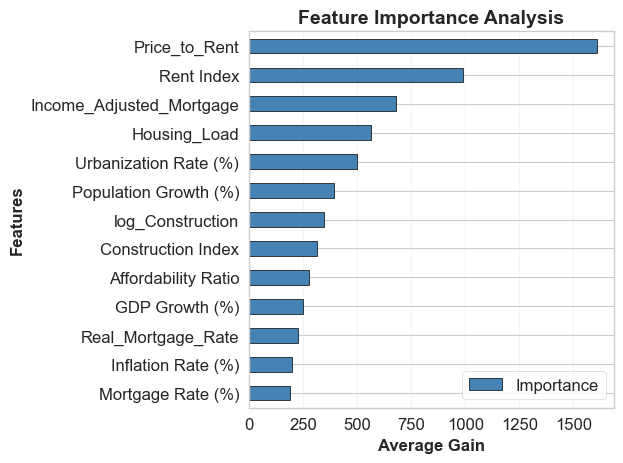

In [38]:
# Feature Importance
plt.figure(figsize=(10, 6))
importance = model.get_score(importance_type='gain')
df_imp = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values('Importance', ascending=True)

df_imp.plot.barh(x='Feature', y='Importance', color='steelblue', edgecolor='k', linewidth=0.5)
plt.xlabel('Average Gain', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Analysis', fontsize=14)
plt.grid(True, axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

## SHAP Analysis

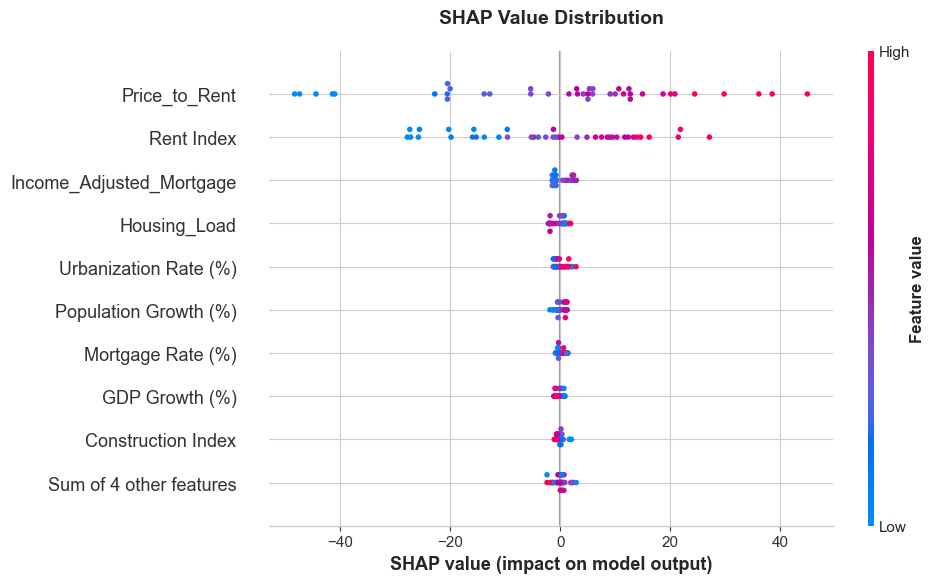

In [41]:
# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

plt.figure()
shap.plots.beeswarm(shap_values, show=False)
plt.gcf().set_size_inches(10, 6)
plt.title('SHAP Value Distribution', fontsize=14, pad=20)
plt.tight_layout()
plt.show()